In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import pickle
import numpy as np

mpl.rcParams['font.serif'] = "Times New Roman"
mpl.rcParams['figure.figsize'] = [3.25,3.25]
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rc('text', usetex='true') 
mpl.rc('font', family='serif') 

plt.rcParams.update({'font.size': 8, 'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'})

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titlesize'] = 16

In [2]:
with open('plot1_LR.p', 'rb') as f:
    a1_LR, a2_LR, a3_LR = pickle.load(f)
with open('plot2_LR.p', 'rb') as f:
    u0, s0, r0 = pickle.load(f)
with open('plot3_LR.p', 'rb') as f:
    u00, s00, r00, eta1 = pickle.load(f)
with open('plot4_LR.p', 'rb') as f:
    b1_LR, b2_LR, b3_LR = pickle.load(f)
with open('plot5_LR.p', 'rb') as f:
    u1, s1, r1 = pickle.load(f)
with open('plot6_LR.p', 'rb') as f:
    u11, s11, r11, eta2 = pickle.load(f)

In [3]:
def NinetyFive_CI(data):
    a = 1.0 * np.array(data)
    m = np.mean(a)
    h = 2*np.std(a)
    return m-h, m, m+h

In [4]:
T = a1_LR.shape[0] - 1

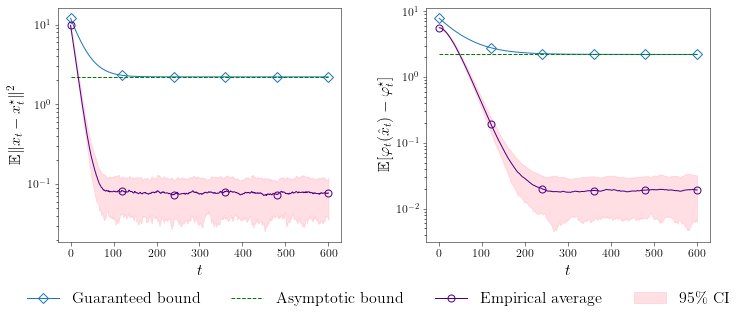

In [5]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['axes.titlesize'] = 16

ax = axes[0]

# 95% confidence interval data
m0 = [NinetyFive_CI(a1_LR[k]) for k in range(a1_LR.shape[0])]
m = np.stack(m0, axis=0)

# Plot a1_LR (with 95% confidence interval), a2_LR, a3_LR
ax.plot(a3_LR, label='Guaranteed bound', color='tab:blue', linestyle='-', marker='D', markerfacecolor='none', markevery=int((T+1)/5))
ax.plot(a2_LR*np.ones(T+1), label='Asymptotic bound', color='green', linestyle='--')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=int((T+1)/5), label='Empirical average')
ax.fill_between(np.arange(0,T+1), m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$ \mathbb{E} \|x_t - x_t^\star\|^2$')
ax.set_yscale('log')
# ax.set_ylim(1e-2,1e2)

ax = axes[1]

# 95% confidence interval data
m0 = [NinetyFive_CI(b1_LR[k]) for k in range(b1_LR.shape[0])]
m = np.stack(m0, axis=0)

# Plot b1_LR (with 95% confidence interval), b2_LR, b3_LR
ax.plot(b3_LR, label='Guaranteed bound', color='tab:blue', linestyle='-', marker='D', markerfacecolor='none', markevery=int((T+1)/5))
ax.plot(b2_LR*np.ones(T+1), label='Asymptotic bound', color='green', linestyle='--')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=int((T+1)/5), label='Empirical average')
ax.fill_between(np.arange(0,T+1), m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\mathbb{E}[\varphi_t(\hat{x}_t) - \varphi_t^\star]$')
ax.set_yscale('log')
# ax.set_ylim(1e-2,1e2)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)
leg = axes[0].legend(loc = 'upper center', frameon=False, bbox_to_anchor=(1.13, -.15),ncol=4)
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth(0.5)
leg.get_frame().set_boxstyle('Square', pad=0)

plt.savefig('Fig_LR1.pdf', bbox_inches='tight')
plt.savefig('/Users/joshuacutler/Dropbox/Joshua+Dima+Zaid/Final_NeurIPS_Submission/Fig_LR1.pdf', bbox_inches='tight')
plt.savefig('/Users/joshuacutler/Dropbox/Joshua+Dima+Zaid/Final_NeurIPS_Submission/Supplement Final/Fig_LR1.pdf', bbox_inches='tight')

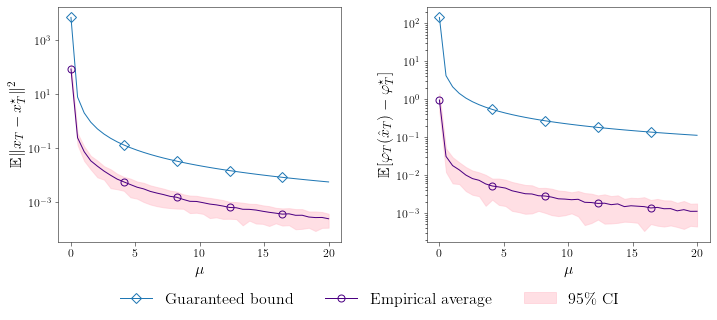

In [6]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['axes.titlesize'] = 16

ax = axes[0]

# 95% confidence interval data
m0 = [NinetyFive_CI(s0[k]) for k in range(s0.shape[0])]
m = np.stack(m0, axis=0)

# plot r0 and s0 (with 95% confidence interval)
ax.plot(u0, r0, color='tab:blue', marker='D', markerfacecolor='none', markevery=8, label='Guaranteed bound')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(u0, m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=8, label='Empirical average')
ax.fill_between(u0, m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$ \mu$')
ax.set_ylabel(r'$ \mathbb{E} \|x_T - x_T^\star\|^2$')
ax.set_yscale('log')
# ax.set_ylim(1e-4,1e6)

ax = axes[1]

# 95% confidence interval data
m0 = [NinetyFive_CI(s1[k]) for k in range(s1.shape[0])]
m = np.stack(m0, axis=0)

# plot r1 and s1 (with 95% confidence interval)
ax.plot(u1, r1, color='tab:blue', marker='D', markerfacecolor='none', markevery=8, label='Guaranteed bound')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(u1, m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=8, label='Empirical average')
ax.fill_between(u1, m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$ \mu$')
ax.set_ylabel(r'$\mathbb{E}[\varphi_T(\hat{x}_T) - \varphi_T^\star]$')
ax.set_yscale('log')
# ax.set_ylim(1e-4,1e6)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)
leg = axes[0].legend(loc = 'upper center', frameon=False, bbox_to_anchor=(1.1, -.15),ncol=4)
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth(0.5)
leg.get_frame().set_boxstyle('Square', pad=0)

plt.savefig('Fig_LR2.pdf', bbox_inches='tight')
plt.savefig('/Users/joshuacutler/Dropbox/Joshua+Dima+Zaid/Final_NeurIPS_Submission/Fig_LR2.pdf', bbox_inches='tight')
plt.savefig('/Users/joshuacutler/Dropbox/Joshua+Dima+Zaid/Final_NeurIPS_Submission/Supplement Final/Fig_LR2.pdf', bbox_inches='tight')

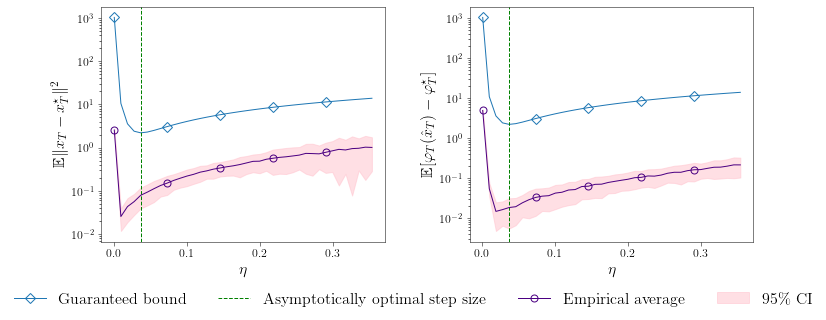

In [7]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['axes.titlesize'] = 16

ax = axes[0]

# 95% confidence interval data
m0 = [NinetyFive_CI(s00[k]) for k in range(s00.shape[0])]
m = np.stack(m0, axis=0)

# plot r00, eta1, and s00 (with 95% confidence interval)
ax.plot(u00, r00, color='tab:blue', marker='D', markerfacecolor='none', markevery=8, label='Guaranteed bound')
ax.axvline(x = eta1, color='green', linestyle='--', label='Asymptotically optimal step size')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(u00, m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=8, label='Empirical average')
ax.fill_between(u00, m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$ \eta$')
ax.set_ylabel(r'$ \mathbb{E} \|x_T - x_T^\star\|^2$')
ax.set_yscale('log')
# ax.set_ylim(1e-3,1e4)

ax = axes[1]

# 95% confidence interval data
m0 = [NinetyFive_CI(s11[k]) for k in range(s11.shape[0])]
m = np.stack(m0, axis=0)

# plot r11, eta2, and s11 (with 95% confidence interval)
ax.plot(u11, r11, color='tab:blue', marker='D', markerfacecolor='none', markevery=8, label='Guaranteed bound')
ax.axvline(x = eta2, color='green', linestyle='--', label='Asymptotically optimal step size')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(u11, m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=8, label='Empirical average')
ax.fill_between(u11, m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$ \eta$')
ax.set_ylabel(r'$\mathbb{E}[\varphi_T(\hat{x}_T) - \varphi_T^\star]$')
ax.set_yscale('log')
# ax.set_ylim(1e-3,1e4)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)
leg = axes[0].legend(loc = 'upper center', frameon=False, bbox_to_anchor=(1.1, -.15),ncol=4)
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth(0.5)
leg.get_frame().set_boxstyle('Square', pad=0)

plt.savefig('Fig_LR3.pdf', bbox_inches='tight')
plt.savefig('/Users/joshuacutler/Dropbox/Joshua+Dima+Zaid/Final_NeurIPS_Submission/Fig_LR3.pdf', bbox_inches='tight')
plt.savefig('/Users/joshuacutler/Dropbox/Joshua+Dima+Zaid/Final_NeurIPS_Submission/Supplement Final/Fig_LR3.pdf', bbox_inches='tight')